# Project: Credit Card Payment Default Prediction

# Problem Statement:

The problem is to distinguish between the borrowers that are likely to repay their credit card debt and borrowers that are likely to default on their debt. So, a bank that only lends to defaulters is likely to fail or make losses.

•	To predict the repayment capability of a customer. So, that the bank can reduce lending loans to defaulters.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,recall_score,f1_score

#warning
import warnings
warnings.filterwarnings('ignore')

# Dataset and  Source:

The dataset contains 30,000 records of data on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.
Link to dataset: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

# Data Loading

In [2]:
#Load the data
cc = pd.read_csv("Credit_Card_payment_default.csv", header = 0)
df = cc

In [3]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


# Variable description:

1.	ID: ID of each client
2.	LIMIT_BAL: Amount of given credit in New Taiwan dollars (includes individual and family/supplementary credit
3.	SEX: Gender (1=male, 2=female)
4.	EDUCATION: (1=graduate school, 2=university, 3=high school, 0=others, 4=others, 5=unknown, 6=unknown)
5.	MARRIAGE: Marital status (1 = married; 2 = single; 3 = divorce; 0=others)
6.	AGE: Age in years
7.	PAY_0: Repayment status in September, 2005 (-2: No consumption; -1: Paid in full; 0: The use of revolving credit; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.)
8.	PAY_2: Repayment status in August, 2005 (scale same as above)
9.	PAY_3: Repayment status in July, 2005 (scale same as above)
10.	PAY_4: Repayment status in June, 2005 (scale same as above)
11.	PAY_5: Repayment status in May, 2005 (scale same as above)
12.	PAY_6: Repayment status in April, 2005 (scale same as above)
13.	BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
14.	BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
15.	BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
16.	BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
17.	BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
18.	BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
19.	PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
20.	PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
21.	PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
22.	PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
23.	PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
24.	PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
25.	default.payment.next.month: Default payment (1=yes, 0=no)


# Data cleaning and Validation 

In [4]:
#Drop NAN and Null values
df.dropna(inplace=True)

In [5]:
#Checking for Null values and cleaning
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [6]:
df.isnull().value_counts()

ID     LIMIT_BAL  SEX    EDUCATION  MARRIAGE  AGE    PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month
False  False      False  False      False     False  False  False  False  False  False  False  False      False      False      False      False      False      False     False     False     False     False     False     False                         30000
dtype: int64

As we have seen above there is no null or nan values in the data.

In [7]:
#Checking records numbers, null values and data type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [8]:
# Dropping the 'ID' column as it is irrelevant to target column
df=df.drop('ID', axis=1)

In [9]:
#Remaining columns in dataset
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [10]:
#Converting all column names to Uppercase
df.columns=df.columns.str.upper()

In [11]:
#Formatting and Renaming the columns
df.columns=df.columns.str.replace('.','_')
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DEFAULT_PAYMENT_NEXT_MONTH'],
      dtype='object')

In [12]:
# From the dataset there is no PAY_1 between PAY_0 and PAY_2 in payment delay columns
# So, Renaming PAY_0 to PAY_1
df.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

In [13]:
#Renaming DEFAULT_PAYMENT_NEXT_MONTH to DEFAULT_PAYMENT
df.rename(columns={'DEFAULT_PAYMENT_NEXT_MONTH':'DEFAULT_PAYMENT'}, inplace=True)
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DEFAULT_PAYMENT'],
      dtype='object')

In [14]:
#from dataset values of Education column are (1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others)
#We can see that 0, 4, 5, 6 = others.So, Changing 0,5,6 to 4 to keep it under 1 category

df['EDUCATION'] = df['EDUCATION'].replace(6,5)
df['EDUCATION'] = df['EDUCATION'].replace(5,4)
df['EDUCATION'] = df['EDUCATION'].replace(0,4)

In [15]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [16]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [17]:
#Not considering as important factor
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

# Visualization

In [18]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_PAYMENT
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [19]:
#Separating X variables and y Variable. 
X_Var = df.drop(['DEFAULT_PAYMENT'], axis=1)
y_Var = df['DEFAULT_PAYMENT']
X_Var.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


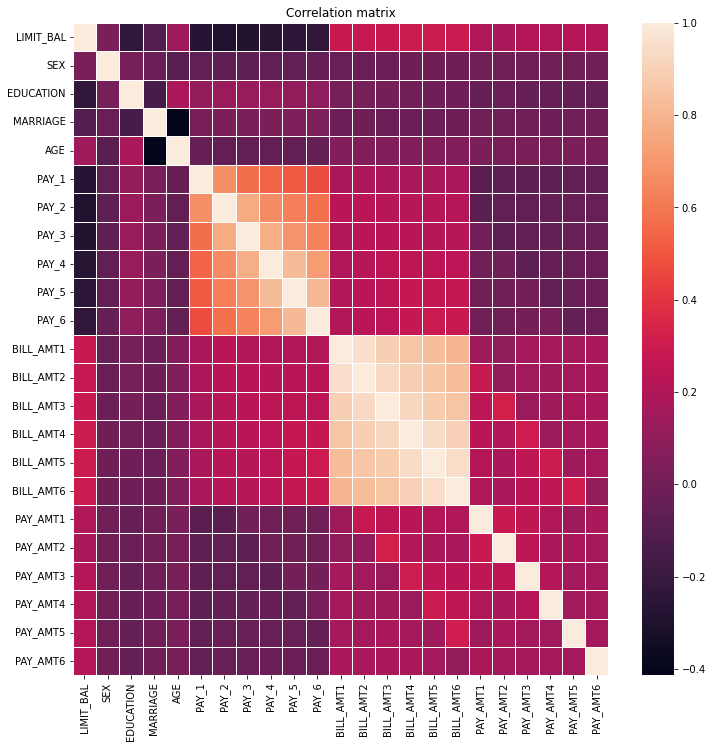

In [20]:
#Correlation among X-variables
corr_matrix = X_Var.corr()
plt.subplots(figsize=(12, 12))
#sns.clustermap(corr_matrix, annot = True, fmt = ".2f")
sns.heatmap(corr_matrix,linewidths=.5)
plt.title("Correlation matrix")
plt.show()

From the correlation matrix, there is high colinearity between BILL_AMT1 to BILL_AMT6, PAY_1 to PAY_6 and some between MARRIAGE and AGE. 

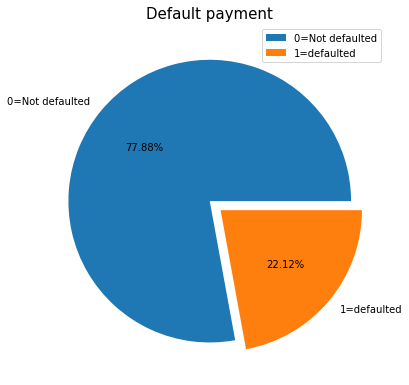

In [21]:
#Total Default payment(y variable)
plt.subplots(figsize=(20,6.5))
plt.pie(df['DEFAULT_PAYMENT'].value_counts(),explode=[0,0.1],labels=['0=Not defaulted','1=defaulted'],autopct='%1.2f%%')
plt.title("Default payment", fontsize=15)
plt.legend()

<Figure size 1440x432 with 0 Axes>

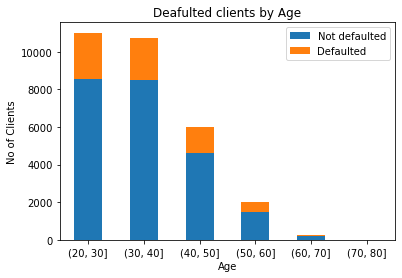

In [22]:
#Deafulted clients by Age
ds=df
ds['Age_category'] = pd.cut(ds['AGE'], bins=[20,30,40,50,60,70,80])
target_count = ds.groupby(['Age_category','DEFAULT_PAYMENT']).AGE.count().unstack()
plt.figure(figsize=(20,6))
target_count.plot(kind='bar', stacked=True)
plt.xticks(rotation=0)
plt.xlabel('Age')
plt.ylabel('No of Clients')
plt.legend(['Not defaulted', 'Defaulted'])
plt.title('Deafulted clients by Age')
plt.show()

As the age increases the number of clients that are likely to default the payment decreases.

<Figure size 1440x432 with 0 Axes>

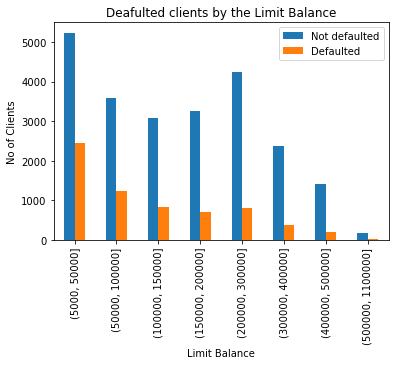

In [23]:
#Deafulted customers by the Limit Balance
ds['limit_cat'] = pd.cut(ds['LIMIT_BAL'],[5000, 50000, 100000, 150000, 200000, 300000, 400000, 500000, 1100000])
target_count = ds.groupby(['limit_cat','DEFAULT_PAYMENT']).LIMIT_BAL.count().unstack()
plt.figure(figsize=(20,6))
target_count.plot(kind='bar')
plt.xlabel('Limit Balance')
plt.ylabel('No of Clients')
plt.legend(['Not defaulted', 'Defaulted'])
plt.title('Deafulted clients by the Limit Balance')
plt.show()

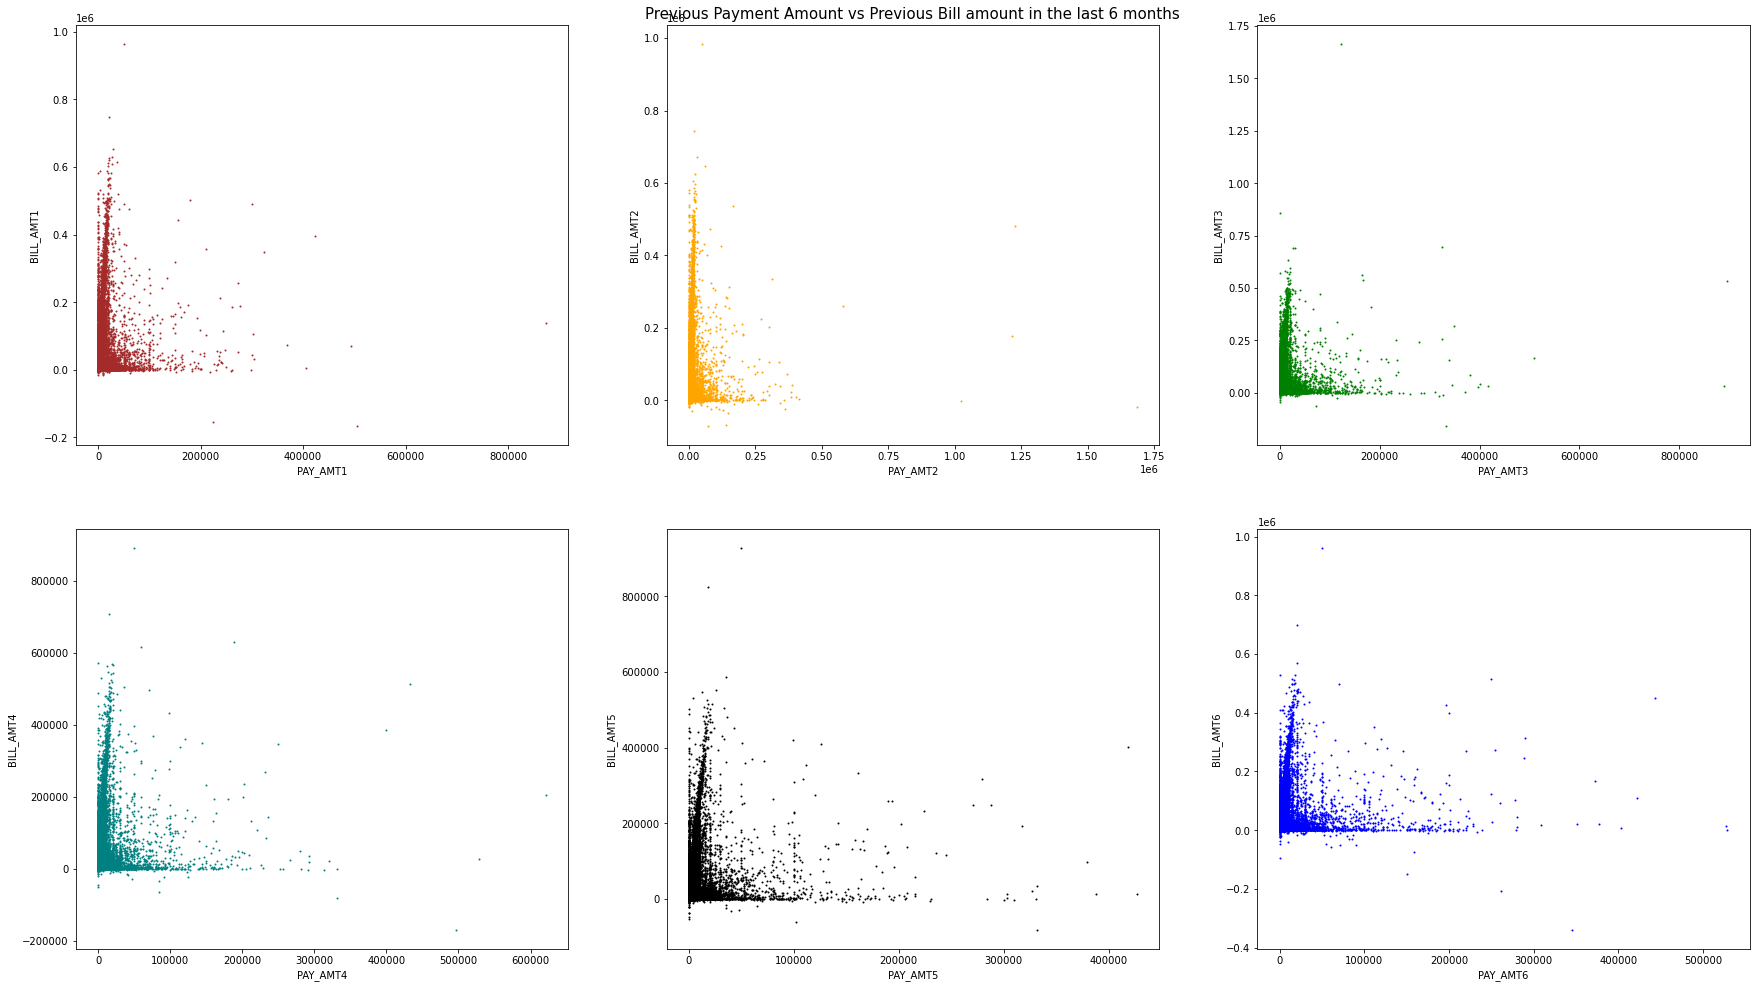

In [24]:
#Previous Payment Amount vs Previous Bill amount in the last 6 months
plt.subplots(figsize=(30,17))
plt.subplot(231)
plt.scatter(x=ds.PAY_AMT1, y=ds.BILL_AMT1, c='brown', s=1)
plt.xlabel('PAY_AMT1')
plt.ylabel('BILL_AMT1')

plt.subplot(232)
plt.scatter(x=ds.PAY_AMT2, y=ds.BILL_AMT2, c='orange', s=1)
plt.xlabel('PAY_AMT2')
plt.ylabel('BILL_AMT2')
plt.title('Previous Payment Amount vs Previous Bill amount in the last 6 months', fontsize=15)

plt.subplot(233)
plt.scatter(x=ds.PAY_AMT3, y=ds.BILL_AMT3, c='green', s=1)
plt.xlabel('PAY_AMT3')
plt.ylabel('BILL_AMT3')

plt.subplot(234)
plt.scatter(x=df.PAY_AMT4, y=df.BILL_AMT4, c='teal', s=1)
plt.xlabel('PAY_AMT4')
plt.ylabel('BILL_AMT4')

plt.subplot(235)
plt.scatter(x=df.PAY_AMT5, y=df.BILL_AMT5, c='black', s=1)
plt.xlabel('PAY_AMT5')
plt.ylabel('BILL_AMT5')

plt.subplot(236)
plt.scatter(x=df.PAY_AMT6, y=df.BILL_AMT6, c='blue', s=1)
plt.xlabel('PAY_AMT6')
plt.ylabel('BILL_AMT6')

plt.show()

Above plots indicates that there is higher proportion of clients for whom the bill amount is high but payment done against the same is very low. We can infer this since maximum number of datapoints are closely packed along the Y-axis near to 0 on X-axis

<AxesSubplot:title={'center':'Marital status of clients'}, xlabel='Marriage status [1 = married; 2 = single; 3 = divorce; 0=others]', ylabel='Count of clients'>

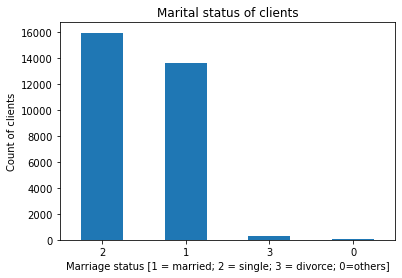

In [25]:
cnts=df.MARRIAGE.value_counts()
cnts.plot(kind = 'bar', xlabel='Marriage status [1 = married; 2 = single; 3 = divorce; 0=others]', ylabel='Count of clients',rot=1, title='Marital status of clients',sort_columns='True')

Most of the clients are either marrined or single.

<AxesSubplot:title={'center':'Education level of Clients'}, ylabel='Education level'>

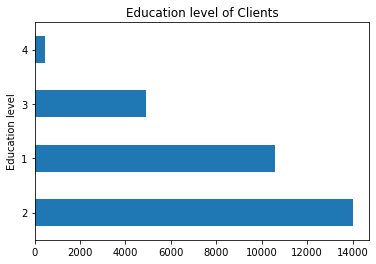

In [26]:
df.EDUCATION.value_counts().plot(kind = "barh", title='Education level of Clients', xlabel='Education level')

from dataset: 1=graduate school, 2=university, 3=high school, 4=others; we can see from above graph that most clients have Education level of university and graduate school.

<AxesSubplot:xlabel='PAY_6'>

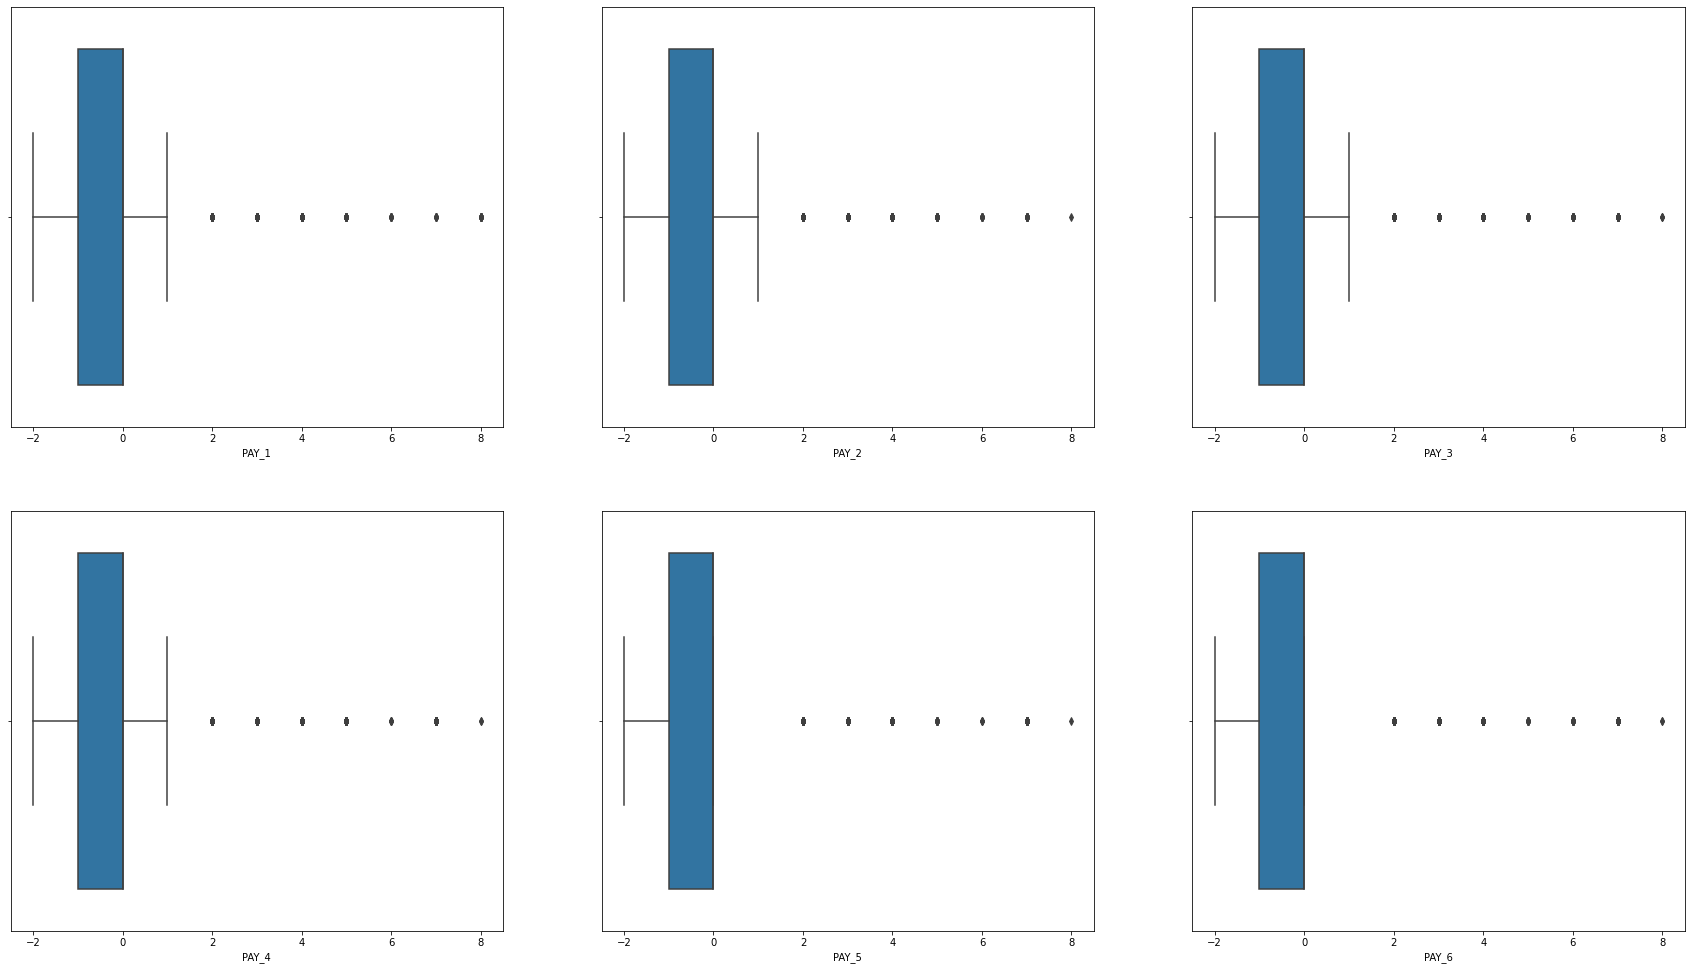

In [27]:
#Payment made in how many months?
#df_box = pd.DataFrame(df, columns=['PAY_1'])
#sns.boxplot(data=pd.DataFrame(df, columns=['PAY_1']), labels=['PAY 1'])
plt.subplots(figsize=(30,17))
plt.subplot(231)
sns.boxplot(x="PAY_1", data=df)

plt.subplot(232)
sns.boxplot(x="PAY_2", data=df)

plt.subplot(233)
sns.boxplot(x="PAY_3", data=df)

plt.subplot(234)
sns.boxplot(x="PAY_4", data=df)

plt.subplot(235)
sns.boxplot(x="PAY_5", data=df)

plt.subplot(236)
sns.boxplot(x="PAY_6", data=df)

# Data partition

In [28]:
#split the data into train data and test data.
X_train, X_test, y_train, y_test = train_test_split(X_Var,y_Var,test_size=0.2, random_state=10)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(24000, 23) (24000,)
(6000, 23) (6000,)


Data is split in 80:20 ratio, where 20% is test data and 80% is used to train the model.

# Modeling

We will use below 3 models to train and test out dataset.

1.Logistic Regression Model

2.K-nearest neighbors Model

3.RandomForest Model

# Logistic Regression model

Input: Test Data

Output: Accuracy

Tool used: sklearn.linear_model

In [29]:
#Logistic Regression model
clf = LogisticRegression(random_state=10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_pred, y_test)
print("Accuracy of testing data::", acc)
print("Confusion matrix:", '\n',cm)
#recall and F1 scores - best value at 1 and worst score at 0
rc = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('Recall score:', rc)
print('f1 score:', f1)

Accuracy of testing data:: 0.7803333333333333
Confusion matrix: 
 [[4680 1315]
 [   3    2]]
Recall score: 0.0015186028853454822
f1 score: 0.00302571860816944


# K-nearest neighbors model

Input: Test Data

Output: Accuracy

Tool used: sklearn.ensemble

In [30]:
#K-nearest neighbors model
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_pred, y_test)
print("Accuracy of testing data: ", acc)
print("Confusion matrix:",'\n', cm)
#recall and F1 scores - best value at 1 and worst score at 0
rc = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('Recall score:', rc)
print('f1 score:', f1)

Accuracy of testing data:  0.7766666666666666
Confusion matrix: 
 [[4536 1193]
 [ 147  124]]
Recall score: 0.09415337889141989
f1 score: 0.15617128463476068


# Random Forest Model

Input: Test Data

Output: Accuracy

Tool used: sklearn.ensemble

In [31]:
#Random Forest Classification model
rf = RandomForestClassifier(random_state=10)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
#Accuracy score
acc = accuracy_score(y_test, y_pred)
#Confusion matrix
cm = confusion_matrix(y_pred, y_test)
print("Accuracy of testing data: ", acc)
print("Confusion matrix:",'\n', cm)
#recall and F1 scores - best value at 1 and worst score at 0
rc = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('Recall score:', rc)
print('f1 score:', f1)

Accuracy of testing data:  0.8205
Confusion matrix: 
 [[4441  835]
 [ 242  482]]
Recall score: 0.3659832953682612
f1 score: 0.47231749142577173


# Evaluation

From all the three models discussed above, we can see that Random forest model has the highest accuracy of 82.05%, followed by Logistic regression with 78.03% and KNN model with 77.66%.